In [28]:
from importlib import reload
import scModel
reload(scModel)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import os

In [29]:
n=20
params = [(v, 0) for v in np.linspace(0,3,n)]
muarr = np.linspace(0,3,n)
x = params
xlabel = r'$\Delta_{p_x+ip_y}$'
xticks = [0,6.67,13.333, 20]
labels= [0,1,2,3]
y = muarr
ylabel = r'$\mu_{A/C}$'

In [30]:
dl, dr=params[10]
mM = scModel.TripletModel(left=dl, right=dr, mu=0.5, muB=1, inhomp=True)
fol = 'leftvsmu_inhom'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\stats\Triplet'"+fol

In [31]:
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [32]:
filename = "infos.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"x-axis: {xlabel}; y-axis: {ylabel}\nleft={mM.left}\nright={mM.right}\nmu={mM.mu}\nt={mM.t}\ninhomogeneous potential={mM.inhomp}\n")
    file.close

In [33]:
maxe = np.ones((n, n))
ave = np.ones((n, n))
std = np.ones((n, n))
mingap_mid = np.ones((n, n))
mingap_mid_to_up = np.ones((n, n))
avgap = np.ones((n, n))

#params = np.concatenate()
for i in range(n):
    mu=muarr[i]
    for j in range(n):
        #mM.Del0, mM.DelD, mM.DelS = params_s[j]
        
        dl, dr=params[j]
        mM = scModel.Model(left=dl, right=dr, mu=mu, muB=1, inhomp=True)
        stat = mM.simple_stats()
        
        maxe[i,j] = stat['maxe'][6]
        ave[i,j] = stat['av'][6]
        std[i,j] = stat['std'][6]
        mingap_mid[i,j] = stat['mingap'][2]
        mingap_mid_to_up[i,j] = stat['mingap'][3]
        avgap[i,j] = stat['avgap'][2]

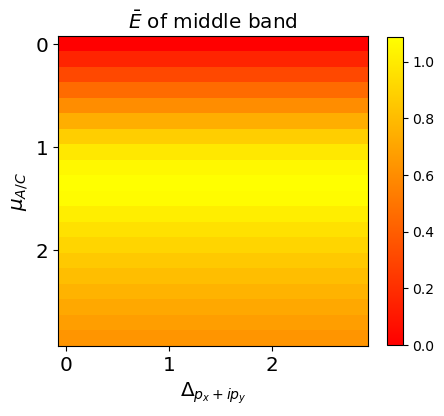

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$\bar{E}$ of middle band', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(ave, cmap='autumn') # Visualize the Hamiltonian matrix
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//av.png")
plt.show()


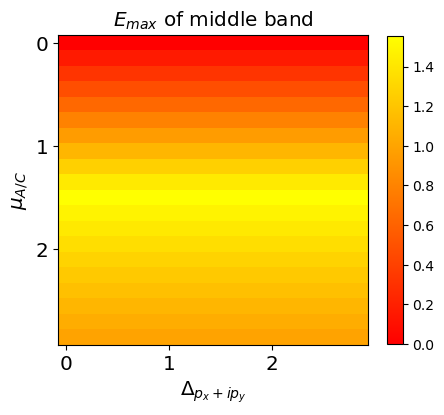

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$E_{max}$ of middle band', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(maxe, cmap='autumn') # Visualize the Hamiltonian matrix
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//maxe.png")
plt.show()


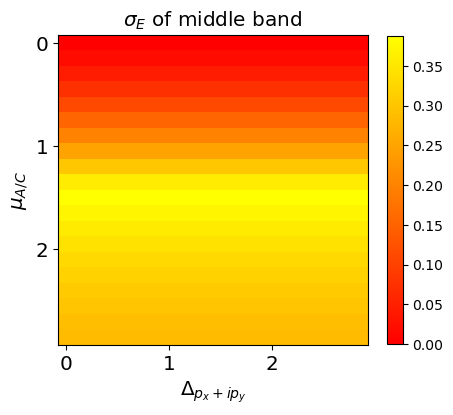

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$\sigma_E$ of middle band', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(std, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//std.png")
plt.show()


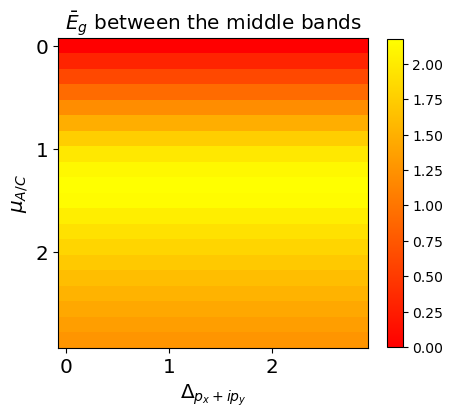

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title(r'$\bar{E}_g$ between the middle bands', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(avgap, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//avgap.png")
plt.show()


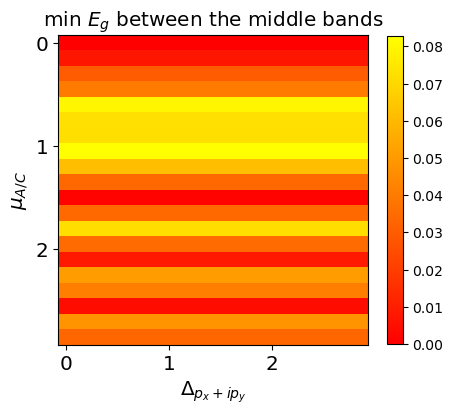

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title('min $E_g$ between the middle bands', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(mingap_mid, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//mingap.png")
plt.show()


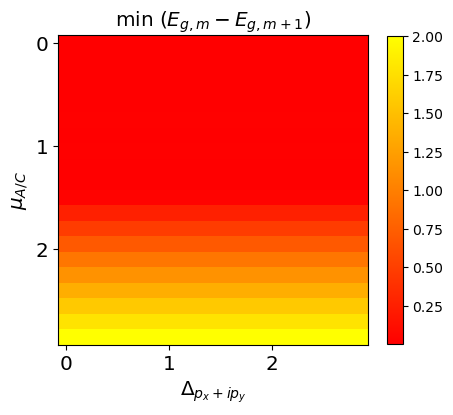

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title('min ($E_{g,m}-E_{g,m+1}$)', size='x-large')
ax.set_xlabel(xlabel, size='x-large')
ax.set_ylabel(ylabel, size='x-large')
ax.set_xticks(ticks=xticks, labels= labels, size='x-large')
ax.set_yticks(ticks=xticks, labels= labels, size='x-large')


pos = ax.imshow(mingap_mid_to_up, cmap='autumn') 
fig.colorbar(pos, ax=ax, shrink=0.8)

plt.savefig(newpath+"//maingap_um.png")
plt.show()
